# Решения уравнения фильтрации для постоянного дебита

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

версия 0.1 от 08.10.2021

---

Решение для бесконечно малого радиуса скважины в пространстве Лапласа будет иметь вид

$$ \tilde{p}_D(s) = \frac{1}{s} K_0 \left( r_D \sqrt s  \right) $$

где 

$K_0$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированная функция Бесселя&nbsp;</a>

Решение для конечного радиуса скважины в пространстве Лапласа будет иметь вид


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s  \right) }{K_1 \left(  \sqrt s  \right)} $$

где 

$K_0$, $K_1$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированные функции Бесселя&nbsp;</a>

Для случая постоянного забойного давления можно получить

$$ \tilde{q}_D(s) = \frac{1}{s^{\frac{1}{2}}} \frac{ K_1 \left(  \sqrt s  \right) }{K_0 \left(  \sqrt s  \right)} $$


Можно заметить для выражений для давления и дебита в пространстве Лапласа верно 

$$ \tilde{p}_D(s) \tilde{q}_D(s) =\frac{1}{s}  $$

In [1]:
# импортируем библиотки, которые могут пригодиться для проведения расчетов
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
mp.dps = 15; mp.pretty = True

%matplotlib inline

In [2]:
# решение линейного стока в пространстве Лапласа
def pd_line_source_lapl(s, rd=1):
  return 1/s * besselk(0, rd*s**0.5)

# решение конечного радиуса скважины в пространстве Лапласа для случая постоянного дебита
def pd_rw_lapl(s, rd=1):
  return 1/s**(3/2) * besselk(0, rd*s**0.5) / besselk(1, s**0.5)

# решение конечного радиуса скважины в пространстве Лапласа для случая постоянного забойного давления
def qd_rw_lapl(s):
  return 1/s**(1/2) * besselk(1, s**0.5) / besselk(0, s**0.5)

In [3]:
# реализация функций расчета обратного преобразования Лапласа
def pd_line_source(rd, td):
  fp = lambda p: pd_line_source_lapl(p, rd)
  return invertlaplace(fp, td, method='stehfest', degree = 5)

def pd_rw(rd, td):
  fp = lambda p: pd_rw_lapl(p, rd)
  return invertlaplace(fp, td, method='stehfest', degree = 5)

def qd_rw(td):
    return invertlaplace(qd_rw_lapl, td, method='stehfest', degree = 5)


In [4]:
# корректируем размер графика, чтобы было побольше 
plt.rcParams['figure.figsize'] = [9, 7]

# Построение графика изменения давления после запуска при постоянном дебите

Решение для конечного радиуса скважины в пространстве Лапласа будет иметь вид


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s  \right) }{K_1 \left(  \sqrt s  \right)} $$


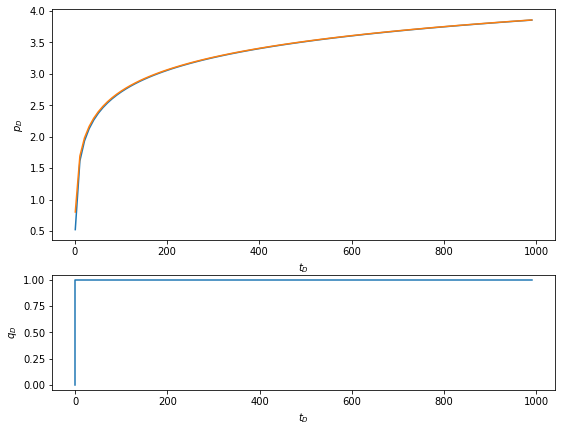

In [5]:
rd=1    # нас интересует только забойное давление

td = np.arange(1, 1000, 10)  # задаем диапазон изменений безразмерного времени

# для отрисовки графика дебита зададим массив с постоянным дебитом с момента td=0
qd = [1 for i in td]
td_q = [0,0,td[-1]]
qd_q = [0,1,1]

# рассчитаем массивы изменения давления - двумя способами - для линейного стока и конечного радиуса скважины
pd = [pd_line_source(rd, ti) for ti in td ]
pd2 = [pd_rw(rd, ti) for ti in td ]

# построим график отображающий рассчитанные значения
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [2, 1]})
ax1.plot(td, pd)
ax1.plot(td, pd2)
ax1.set_xlabel("$t_D$")
ax1.set_ylabel("$p_D$")

ax2.plot(td_q, qd_q)
ax2.set_xlabel("$t_D$")
ax2.set_ylabel("$q_D$")
plt.show()

# Построение графика изменения дебита после запуска с постоянным забойным давлением
Для случая постоянного забойного давления можно получить

$$ \tilde{q}_D(s) = \frac{1}{s^{\frac{1}{2}}} \frac{ K_1 \left(  \sqrt s  \right) }{K_0 \left(  \sqrt s  \right)} $$

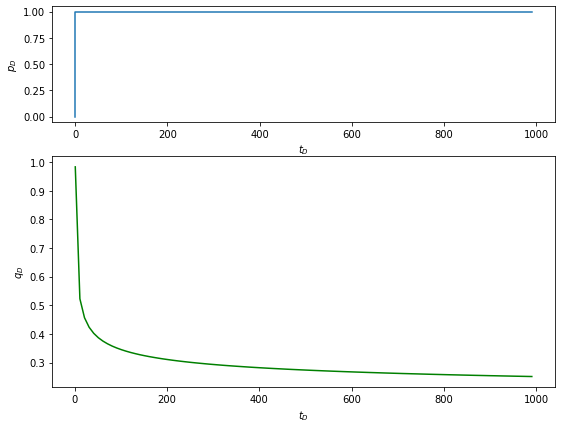

In [6]:
rd=1    # нас интересует только забойное давление
td = np.arange(1, 1000, 10)    # задаем диапазон изменений безразмерного времени
pd = [1 for i in td]

# для отрисовки графика давлений зададим массив с постоянным давлением с момента td=0
td_q = [0,0,td[-1]]
pd_q = [0,1,1]

# рассчитаем массивы изменения дебита 
qd = [qd_rw(ti) for ti in td ]

# построим график отображающий рассчитанные значения
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 2]})
ax1.plot(td_q, pd_q)
ax1.set_xlabel("$t_D$")
ax1.set_ylabel("$p_D$")

ax2.plot(td, qd, color='green')
ax2.set_xlabel("$t_D$")
ax2.set_ylabel("$q_D$")
plt.show()


# Задание 

1. Постройте графики в размерных переменных